In [19]:
def rho_red_light(nx, rho_max, rho_in):
    rho = rho_max*numpy.ones(nx)
    rho[:int((nx-1)*3./4.)] = rho_in
    return rho

In [20]:
help(rho_red_light)

Help on function rho_red_light in module __main__:

rho_red_light(nx, rho_max, rho_in)



In [46]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family']= 'serif'
rcParams['font.size'] = 16
from matplotlib import animation
from IPython.display import HTML

In [47]:
nx = 100
nt = 30
dx = 4.0/nx

rho_in = 5. 
rho_max = 10.

V_max = 1.

x = numpy.linspace(0+0.5*dx, 4-0.5*dx, nx)

rho = rho_red_light(nx, rho_max, rho_in)

In [48]:
def animation(data):
    x = numpy.linespace(0+0.5*dx, 4-0.5*dx, nx)
    y = data
    line.set_data(x, y)
    return line,

In [49]:
def godunov(rho, nt, dt, dx, rho_max, V_max):
    rho_n = numpy.zeros((nt, len(rho)))
    rho_n[:,:] = rho.copy()
    rho_plus = numpy.zeros_like(rho)
    rho_minus = numpy.zeros_like(rho)
    flux = numpy.zeros_like(rho)
    for t in range(1, nt):
        rho_plus[:-1] = rho[1:]
        rho_minus = rho.copy()
        flux = 0.5*(computeF(V_max, rho_max, rho_minus)+\
                   computeF(V_max, rho_max, rho_plus)+\
                   dx/dt*(rho_minus - rho_plus))
        rho_n[t, 1: -1] = rho[1: -1] + dt/dx*(flux[:-2]-flux[1:-1])
        rho_n[t, 0] = rho[0]
        rho_n[t, -1] = rho[-1]
        rho = rho_n[t].copy()
    return rho_n

In [50]:
def computeF(u_max, rho_max, rho):
    return u_max*rho*(1-rho/rho_max)

In [51]:
sigma = 1.0
dt = sigma*dx/V_max
rho = rho_red_light(nx, rho_max, rho_in)
rho_n = godunov(rho, nt, dt, dx, rho_max, V_max)

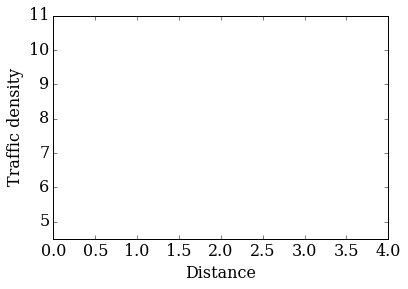

In [52]:
fig = pyplot.figure()
ax = pyplot.axes(xlim = (0, 4), ylim=(4.5,11), xlabel=('Distance'), ylabel=('Traffic density'))
line, = ax.plot([],[], color='#003366', lw=2)

In [53]:
from matplotlib import animation
from IPython.display import HTML

In [54]:
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_html5_video())

In [55]:
#Basic initial condition parameters
#defining grid size, time steps, CFL condition, etc...
nx = 100
nt = 30
dx = 4.0/nx

rho_in = 5.
rho_max = 10.

V_max = 1.

# x_i now is the center of the i-th cell
x = numpy.linspace(0+0.5*dx, 4-0.5*dx, nx)


rho = rho_red_light(nx, rho_max, rho_in)

In [56]:
def animate(data):
    x = numpy.linspace(0+0.5*dx, 4-0.5*dx, nx)
    y = data
    line.set_data(x,y)
    return line,

In [57]:
def godunov(rho, nt, dt, dx, rho_max, V_max):
    """ Computes the solution with the Godunov scheme using the Lax-Friedrichs flux.
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    V_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))      
    #copy the initial u array into each row of our new array
    rho_n[:,:] = rho.copy()              
    
    #setup some temporary arrays
    rho_plus = numpy.zeros_like(rho)
    rho_minus = numpy.zeros_like(rho)
    flux = numpy.zeros_like(rho)
  
    for t in range(1,nt):
        
        rho_plus[:-1] = rho[1:] # Can't do i+1/2 indices, so cell boundary
        rho_minus = rho.copy() # arrays at index i are at location i+1/2
        flux = 0.5 * (computeF(V_max, rho_max, rho_minus) + 
                      computeF(V_max, rho_max, rho_plus) + 
                      dx / dt * (rho_minus - rho_plus))
        rho_n[t,1:-1] = rho[1:-1] + dt/dx*(flux[:-2]-flux[1:-1])
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()
        
    return rho_n

In [58]:
sigma = 1.0
dt = sigma*dx/V_max

rho = rho_red_light(nx, rho_max, rho_in)      #make sure that u is set to our expected initial conditions
rho_n = godunov(rho, nt, dt, dx, rho_max, V_max)

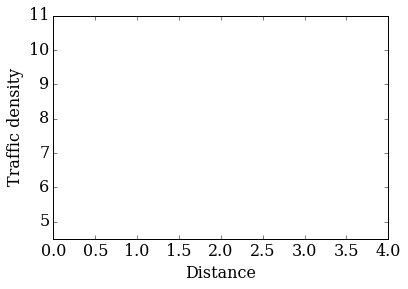

In [59]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

In [60]:
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_html5_video())

In [66]:
def minmod(e, dx):
    sigma = numpy.zeros_like(e)
    de_minus = numpy.ones_like(e)
    de_plus = numpy.ones_like(e)
    
    de_minus[1:] = (e[1:]- e[:-1])/dx
    de_plus[:-1] = (e[1:]- e[:-1])/dx
    
    for i in range(1, len(e)-1):
        if (de_minus[i]*de_plus[i]<0.0):
            sigma[i]=0.0
        elif (numpy.abs(de_minus[i])<numpy.abs(de_plus[i])):
            sigma[i] = de_minus[i]
        else:
            sigma[i] = de_plus[i]
    return sigma

In [67]:
def muscl(rho, nt, dt, dx, rho_max, V_max):
    rho_n = numpy.zeros((nt, len(rho)))
    rho_n[:,:] = rho.copy()
    
    rho_plus = numpy.zeros_like(rho)
    rho_minus = numpy.zeros_like(rho)
    flux = numpy.zeros_like(rho)
    rho_star = numpy.zeros_like(rho)
    
    for t in range(1,nt):
               
        sigma = minmod(rho,dx) 
        rho_left = rho + sigma*dx/2.
        rho_right = rho - sigma*dx/2.     
        
        flux_left = computeF(V_max, rho_max, rho_left) 
        flux_right = computeF(V_max, rho_max, rho_right)
        

        flux[:-1] = 0.5 * (flux_right[1:] + flux_left[:-1] - dx/dt *\
                          (rho_right[1:] - rho_left[:-1] ))
        
   
        rho_star[1:-1] = rho[1:-1] + dt/dx * (flux[:-2] - flux[1:-1])
        
        rho_star[0] = rho[0]
        rho_star[-1] = rho[-1]
        
        
        sigma = minmod(rho_star,dx) 
    
   
        rho_left = rho_star + sigma*dx/2.
        rho_right = rho_star - sigma*dx/2.
        
        flux_left = computeF(V_max, rho_max, rho_left) 
        flux_right = computeF(V_max, rho_max, rho_right)
        
        flux[:-1] = 0.5 * (flux_right[1:] + flux_left[:-1] - dx/dt *\
                          (rho_right[1:] - rho_left[:-1] ))
        
        rho_n[t,1:-1] = .5 * (rho[1:-1] + rho_star[1:-1] + dt/dx * (flux[:-2] - flux[1:-1]))
        
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()
        
    return rho_n

In [68]:
sigma = 1.
dt = sigma*dx/V_max
rho = rho_red_light(nx, rho_max, rho_in)     
rho_n = muscl(rho, nt, dt, dx, rho_max, V_max)

In [ ]:
anim = animation.FuncAnimation(fig, animate, frames)